In [93]:
%reset -f
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

interval = 1
if(interval==0):
    original_prices = pd.read_csv("HistoricalPrices.csv", sep=r'\s*,\s*', engine = 'python')[::-1].reset_index(drop=True)
    prices = original_prices.copy(deep = True)
    prices['Date'] = prices['Date'].apply(lambda x: int(''.join(x[0:5].split('/'))))
else:
    original_prices = pd.read_csv("EURUSD_H1.csv", names = ('Date','Close','A','B','C','D'))[::-1].reset_index(drop=True)
    prices = original_prices.copy(deep = True)
    prices['Date'] = prices['Date'].apply(lambda x: int(''.join(re.split(r'-|\s',x[5:13]))))

# Current close minus previous close
prices['Difference'] = prices['Close'].diff(1).fillna(0)   

# Current different divided by previous close
prices['Ratio'] = prices['Difference'].div(prices['Close'].shift(1)).fillna(0)


prices

,Date,Close,A,B,C,D,Difference,Ratio
0,41620,1.19811,1.19827,1.19803,1.19805,1464,0.00000,0.000000
1,41619,1.19781,1.19822,1.19781,1.19812,1547,-0.00030,-0.000250
2,41618,1.19767,1.19795,1.19723,1.19783,1409,-0.00014,-0.000117
3,41617,1.19803,1.19834,1.19767,1.19767,1551,0.00036,0.000301
4,41616,1.19784,1.19805,1.19755,1.19805,2543,-0.00019,-0.000159
...,...,...,...,...,...,...,...,...
49995,40816,1.30077,1.30145,1.30069,1.30086,6175,-0.00010,-0.000077
49996,40815,1.30172,1.30187,1.29940,1.30078,13585,0.00095,0.000730
49997,40814,1.30235,1.30258,1.30087,1.30172,15632,0.00063,0.000484
49998,40813,1.30266,1.30273,1.30030,1.30233,16246,0.00031,0.000238


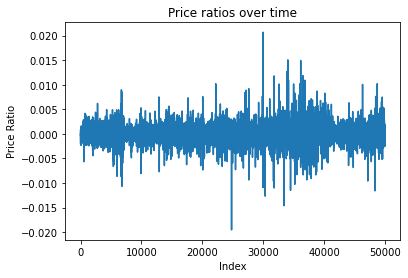

In [94]:
fig = plt.figure()
prices['Ratio'].plot()
plt.xlabel("Index")
plt.ylabel("Price Ratio")
plt.title("Price ratios over time")
plt.show()

In [95]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

# Standardize the columns
prices_standardized=(prices-prices.min())/(prices.max()-prices.min())

prices_standardized

,Date,Close,A,B,C,D,Difference,Ratio
0,0.278743,0.450584,0.445061,0.454482,0.450331,0.000575,0.483250,0.485922
1,0.278735,0.449752,0.444923,0.453873,0.450525,0.000608,0.476460,0.479701
2,0.278726,0.449364,0.444178,0.452265,0.449721,0.000554,0.480081,0.483018
3,0.278717,0.450362,0.445254,0.453485,0.449278,0.000610,0.491399,0.493390
4,0.278708,0.449835,0.444454,0.453152,0.450331,0.001000,0.478950,0.481982
...,...,...,...,...,...,...,...,...
49995,0.271628,0.735189,0.729845,0.738977,0.735368,0.002428,0.480987,0.484012
49996,0.271619,0.737823,0.731004,0.735403,0.735147,0.005342,0.504753,0.504068
49997,0.271611,0.739569,0.732963,0.739476,0.737753,0.006147,0.497510,0.497947
49998,0.271602,0.740429,0.733377,0.737897,0.739444,0.006389,0.490267,0.491836


In [ ]:
#%matplotlib notebook

# Finding the value of K
cost =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(prices_standardized) # USE STANDARDIZED DATA HERE
      
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)
    
    
# plot the cost against K values   
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.title("FIGURE 8: ELBOW PLOT TO DETERMINE OPTIMUM VALUE OF K")
plt.show()

In [ ]:
#####################################################################################
# BEGIN K-MEANS
#####################################################################################
num_clusters = 5
kmeans = KMeans(n_clusters= num_clusters)
label = kmeans.fit_predict(prices_standardized) 
u_labels = np.unique(label)

idx = np.array(list(prices.index))
close_price = np.array(list(prices['Close']))


fig = plt.figure()
for i in u_labels:
    plt.scatter(idx[label == i] , close_price[label == i] , label = i) 
plt.legend()
plt.xlabel("index")
plt.ylabel("prices")
plt.title("K-MEANS CLUSTERS AT K={}".format(num_clusters))
plt.show()
